# RetrievalSystem Evaluation
In this notebook we will evaluate our Retrieval Model
We do this by conducting the following steps:
1. Prepare an evluation dataset, that where we ourselves identify the most similar documents
2. Perform Retrieval
3. Calculate Metrics


In [1]:
evaluation_data = [
    {
        "query": "A family-owned bakery that specializes in gluten-free and vegan pastries, offering custom cake designs for weddings, birthdays, and corporate events, with an emphasis on locally sourced organic ingredients.",
        "relevant_ids": ["FLO", "CAKE", 'BGS', 'CHEF', 'EDBL', 'MDLZ', "CASY", "CHSN", "COST", "DAR", "GIS", "JBT", 'FLWS', 'MGPI', 'CALM', 'NGVC', 'LWAY', 'DNUT']
    },
    {
        "query": "A luxury wellness retreat that combines spa treatments, yoga classes, and nutrition counseling, all set in a secluded mountain location with eco-friendly accommodations and farm-to-table dining.",
        "relevant_ids": ["PERF", "PLBY", "SMTI", 'NATR', 'MRM', 'HLF', 'NHTC', 'HCWC', 'LTH', 'MTEX', 'SNYR', 'ATPC', 'WSR', 'ACHC', 'PK', 'HCSG']
    },
    {
        "query": "An AI-driven personal finance platform that provides automated budgeting, expense tracking, and investment advice, with customizable dashboards tailored to individual financial goals.",
        "relevant_ids": ['UTES', 'MVV', 'LDUR', 'FNDX', 'YCL', 'YCS', 'FNDA',  'FIW', 'FNDE', 'SAA', 'AIVL', 'DEEF', 'IDHQ']
    },
    {
        "query": "A community-driven marketplace for trading rare and antique books, featuring an integrated book valuation tool, seller profiles, and live auctions for collectors.",
        "relevant_ids": ['SVV', 'HGBL', 'ACVA', 'AMWD', 'MKTX', 'KAR', 'REG', 'TW', 'BNED', 'DIBS', 'UXIN', 'DUO']
    },
    {
        "query": "A jewelry boutique that designs custom engagement rings and heirloom pieces using 3D printing technology, ethically sourced gemstones, and a consultation-first design process.",
        "relevant_ids": ['BGI', 'BRLT', 'SIG', 'CTHR', 'CSTE', 'KRNT', 'DDD', 'JEWL', 'ZDGE', 'MTLS', 'KRT', 'SSYS', 'XMTR', 'YHGJ', 'SFHG', 'ZBH']
    },
    {
        "query": "A mobile app that connects foodies with gourmet food trucks in their area, offering live location tracking, exclusive discounts, and the ability to pre-order meals for pickup.",
        "relevant_ids": ['AIVI', 'PRST', 'HEPS', 'TBBB', 'TOST', 'PFGC', 'CART', 'LSPD', 'CHEF', 'YELP', 'PSMT', 'WFCF', 'SNAX', 'KR', 'HFFG']
    },
    {
        "query": "A coworking space specifically designed for digital nomads, featuring private pods, high-speed internet, on-site accommodation, and a community-focused events calendar for networking.",
        "relevant_ids": [ 'INSG', 'SQSP', 'VEEA', 'PUBM', 'DLR', 'WSC', 'ONTF', 'BASE', 'NXT', 'NTRP',  'META', 'ABNB', 'BMBL']
    },
    {
        "query": "A furniture restoration business that breathes new life into vintage pieces using sustainable practices, offering customers detailed progress updates and the option to customize finishes.",
        "relevant_ids": ['BSET', 'AMWD', 'MLKN', 'SCS', 'BYON', 'HGBL', 'ARHS', 'NVFY', 'AZEK', 'JELD', 'JUNE', 'TNC', 'TILE', 'MATW', 'HOFT', 'NWGL']
    },
    {
        "query": "An on-demand meal kit delivery service that focuses on regional cuisines from around the world, providing authentic recipes, pre-portioned ingredients, and cultural context for each dish.",
        "relevant_ids": ['PC', 'ABVE', 'CHEF', 'MKC', 'QSR', 'HFFG', 'SYY', 'DIN', 'CAG', 'NOMD', 'DDC', 'PFGC', 'KRT', 'JBT', 'BGS', 'HRL']
    },
    {
        "query": "A tech consultancy helping startups implement blockchain solutions, including tokenization of assets, smart contract development, and compliance with global cryptocurrency regulations.",
        "relevant_ids": [ 'BCSA', 'COIN', 'ICG', 'GBBK', 'BTOG', 'TDTH', 'FRGE', 'NUKKW',  'MSTR', 'ARBK', 'BITF', 'MATH']
    }
]


## Now we use our Model to perform the retrieval

In [2]:
from RetrievalSystem.RetrievalSystem import RetrievalSystem

embeddings_path = "../RetrievalSystem/Embeddings/embeddings.csv"
retrieval_system = RetrievalSystem(path=embeddings_path)

# Example Evaluation
results = []
for data in evaluation_data:
    query = data["query"]
    relevant_ids = data["relevant_ids"]

    _, documents_identifier = retrieval_system.find_similar_entries(text=query, top_n=16)
    tickers = documents_identifier["tickers"].values

    print("'" + "', '".join(tickers) + "'")
    results.append((relevant_ids, tickers))


/home/jonathan-maier/Documents/AIR/AIR-Project/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


'FLO', 'BGS', 'CAKE', 'CHEF', 'GIS', 'EDBL', 'MDLZ', 'UNFI', 'FLWS', 'MGPI', 'CALM', 'MSS', 'DAR', 'NGVC', 'LWAY', 'DNUT'
'OSW', 'NATR', 'MRM', 'HLF', 'NHTC', 'HCWC', 'LTH', 'MTEX', 'SNYR', 'ATPC', 'WSR', 'ACHC', 'PK', 'HCSG', 'STKS', 'BODI'
'AIVI', 'UTES', 'MVV', 'LDUR', 'FNDX', 'YCL', 'YCS', 'FNDA', 'IAU', 'SSO', 'FIW', 'FNDE', 'SAA', 'AIVL', 'DEEF', 'IDHQ'
'SVV', 'AMWD', 'MKTX', 'HGBL', 'ACVA', 'KAR', 'SFHG', 'PUBM', 'DUO', 'REGCO', 'REGCP', 'REG', 'TW', 'BNED', 'DIBS', 'UXIN'
'BGI', 'BRLT', 'SIG', 'CTHR', 'CSTE', 'JEWL', 'ZDGE', 'KRNT', 'DDD', 'MTLS', 'KRT', 'SSYS', 'XMTR', 'YHGJ', 'SFHG', 'ZBH'
'PRST', 'HEPS', 'PFGC', 'NDLS', 'VLGEA', 'CART', 'LSPD', 'TBBB', 'TOST', 'CHEF', 'YELP', 'PSMT', 'WFCF', 'SNAX', 'KR', 'HFFG'
'PUBM', 'DLR', 'WSC', 'ONTF', 'INSG', 'SQSP', 'VEEA', 'BASE', 'NXT', 'NTRP', 'LUNR', 'LTRPB', 'LTRPA', 'META', 'ABNB', 'BMBL'
'BYON', 'HGBL', 'ARHS', 'BSET', 'AMWD', 'MLKN', 'SCS', 'NVFY', 'AZEK', 'JELD', 'JUNE', 'TNC', 'TILE', 'MATW', 'HOFT', 'NWGL'
'PC', 'ABVE', 'C

### 3. Define Evaluation Metrics
Common metrics for retrieval tasks:

- **Precision@K**: The proportion of relevant documents in the top \( K \) results.
    - Optimal: **1**
- **Recall@K**: The proportion of relevant documents retrieved within the top \( K \).
    - Optimal: **1**
- **Mean Reciprocal Rank (MRR)**: The average reciprocal rank of the first relevant document for all queries.
    - Optimal: **1**
- **Mean Average Precision (MAP)**: The mean of average precision scores for all queries.
    - Optimal: **1**
- **Normalized Discounted Cumulative Gain (nDCG)**: A measure that accounts for the position of relevant documents in the ranked list, giving higher scores for higher ranks.
    - Optimal: **1**


In [3]:
from sklearn.metrics import ndcg_score
import numpy as np

def precision_at_k(relevant_ids, retrieved_ids, k):
    retrieved_at_k = retrieved_ids[:k]
    relevant_at_k = len(set(relevant_ids) & set(retrieved_at_k))
    return relevant_at_k / k

def recall_at_k(relevant_ids, retrieved_ids, k):
    retrieved_at_k = retrieved_ids[:k]
    relevant_at_k = len(set(relevant_ids) & set(retrieved_at_k))
    return relevant_at_k / len(relevant_ids)

def mean_reciprocal_rank(results):
    reciprocal_ranks = []
    for relevant_ids, retrieved_ids in results:
        for rank, doc_id in enumerate(retrieved_ids, start=1):
            if doc_id in relevant_ids:
                reciprocal_ranks.append(1 / rank)
                break
        else:
            reciprocal_ranks.append(0)
    return reciprocal_ranks, np.mean(reciprocal_ranks)

def average_precision(relevant_ids, retrieved_ids):
    num_relevant = 0
    precision_sum = 0
    for rank, doc_id in enumerate(retrieved_ids, start=1):
        if doc_id in relevant_ids:
            num_relevant += 1
            precision_sum += num_relevant / rank
    if len(relevant_ids) == 0:
        return 0
    return precision_sum / len(relevant_ids)

def mean_average_precision(results):
    average_precisions = [
        average_precision(relevant_ids, retrieved_ids)
        for relevant_ids, retrieved_ids in results
    ]
    return np.mean(average_precisions)

def dcg(relevant_ids, retrieved_ids, k):
    dcg_score = 0
    for i, doc_id in enumerate(retrieved_ids[:k], start=1):
        if doc_id in relevant_ids:
            dcg_score += 1 / np.log2(i + 1)
    return dcg_score

def ndcg(relevant_ids, retrieved_ids, k):
    dcg_score = dcg(relevant_ids, retrieved_ids, k)
    ideal_retrieved_ids = relevant_ids[:k]
    idcg_score = dcg(relevant_ids, ideal_retrieved_ids, k)
    if idcg_score == 0:
        return 0
    return dcg_score / idcg_score

# Compute Metrics
k = 12
precision_scores = [precision_at_k(r, t, k) for r, t in results]
recall_scores = [recall_at_k(r, t, k) for r, t in results]
ranks, mrr = mean_reciprocal_rank(results)
map_score = mean_average_precision(results)
ndcg_scores = [ndcg(r, t, k) for r, t in results]
mean_ndcg = np.mean(ndcg_scores)


### Visualize Results

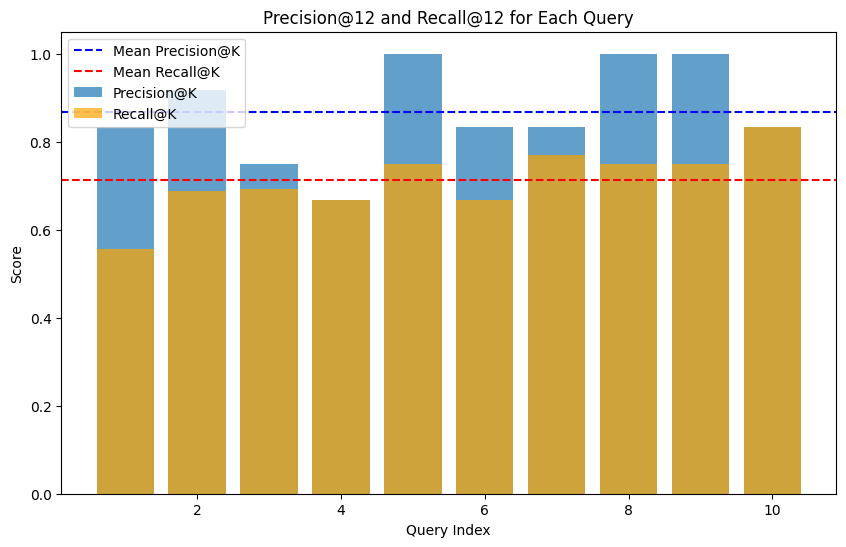

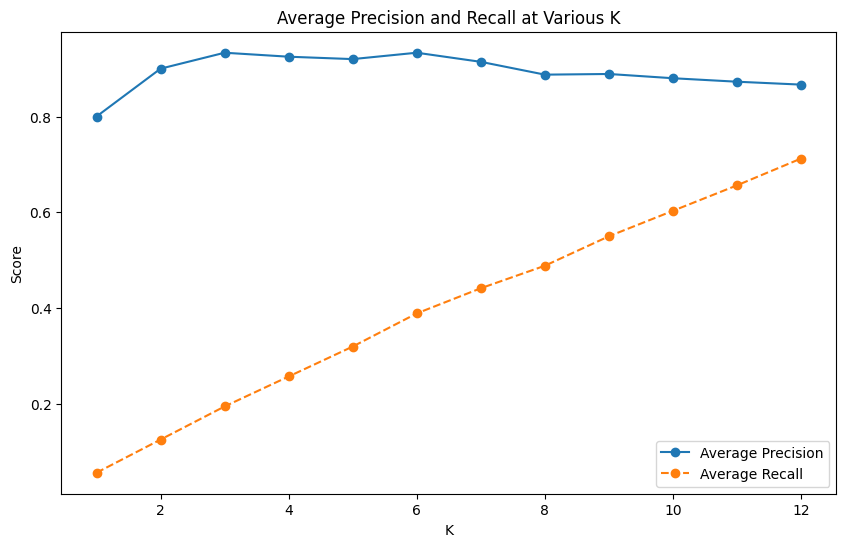

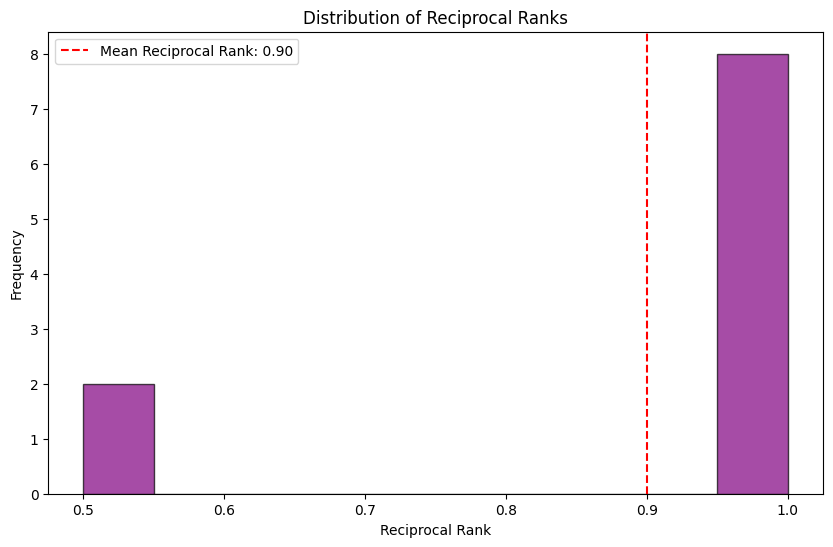

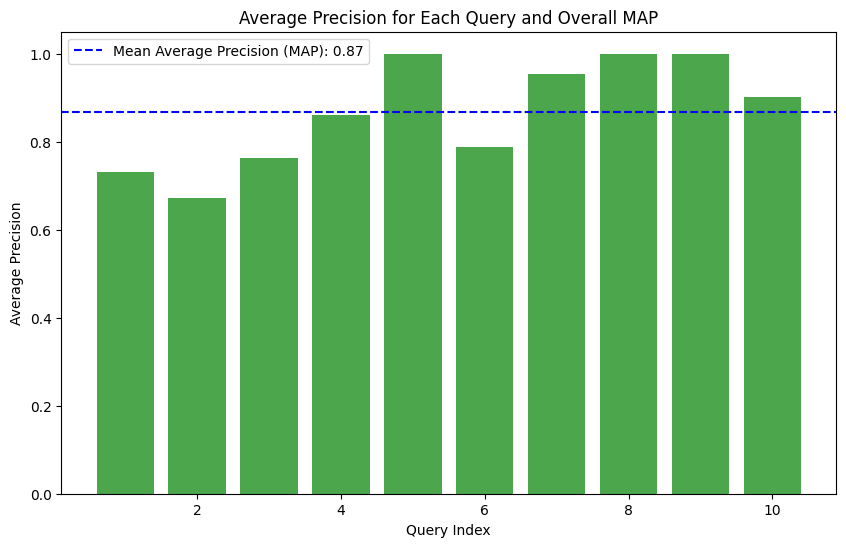

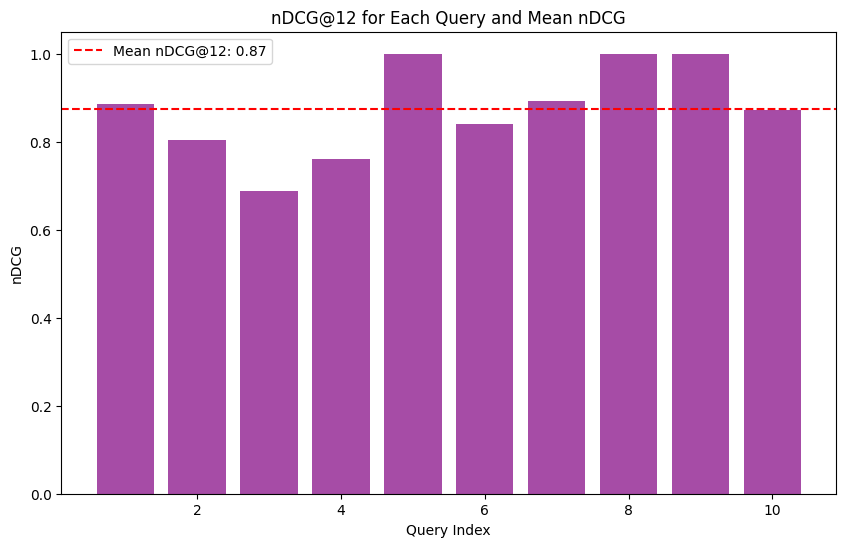

In [5]:
import matplotlib.pyplot as plt
import os

# Ensure the folder exists
output_folder = "RetrievalModelEvaluationImages"
os.makedirs(output_folder, exist_ok=True)

plt.figure(figsize=(10, 6))
x = range(1, len(precision_scores) + 1)
plt.bar(x, precision_scores, alpha=0.7, label="Precision@K")
plt.bar(x, recall_scores, alpha=0.7, label="Recall@K", color="orange")
plt.axhline(np.mean(precision_scores), color="blue", linestyle="--", label="Mean Precision@K")
plt.axhline(np.mean(recall_scores), color="red", linestyle="--", label="Mean Recall@K")
plt.xlabel("Query Index")
plt.ylabel("Score")
plt.title(f"Precision@{k} and Recall@{k} for Each Query")
plt.legend()
plt.savefig(os.path.join(output_folder, "precision_recall_per_query.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Line plot for Average Precision and Recall across different K values
ks = list(range(1, k + 1))
avg_precision = [np.mean([precision_at_k(r, t, k) for r, t in results]) for k in ks]
avg_recall = [np.mean([recall_at_k(r, t, k) for r, t in results]) for k in ks]

plt.figure(figsize=(10, 6))
plt.plot(ks, avg_precision, marker="o", label="Average Precision")
plt.plot(ks, avg_recall, marker="o", label="Average Recall", linestyle="--")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Average Precision and Recall at Various K")
plt.legend()
plt.savefig(os.path.join(output_folder, "average_precision_recall.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Plot Mean Reciprocal Rank as a Histogram
plt.figure(figsize=(10, 6))
plt.hist(ranks, bins=10, alpha=0.7, color="purple", edgecolor="black")
plt.axvline(mrr, color="red", linestyle="--", label=f"Mean Reciprocal Rank: {mrr:.2f}")
plt.xlabel("Reciprocal Rank")
plt.ylabel("Frequency")
plt.title("Distribution of Reciprocal Ranks")
plt.legend()
plt.savefig(os.path.join(output_folder, "reciprocal_rank_distribution.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Plot MAP as a Bar Chart
plt.figure(figsize=(10, 6))
map_scores = [average_precision(r, t) for r, t in results]
plt.bar(range(1, len(map_scores) + 1), map_scores, alpha=0.7, color="green")
plt.axhline(map_score, color="blue", linestyle="--", label=f"Mean Average Precision (MAP): {map_score:.2f}")
plt.xlabel("Query Index")
plt.ylabel("Average Precision")
plt.title("Average Precision for Each Query and Overall MAP")
plt.legend()
plt.savefig(os.path.join(output_folder, "map_per_query.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Plot nDCG for Each Query
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(ndcg_scores) + 1), ndcg_scores, alpha=0.7, color="purple")
plt.axhline(mean_ndcg, color="red", linestyle="--", label=f"Mean nDCG@{k}: {mean_ndcg:.2f}")
plt.xlabel("Query Index")
plt.ylabel("nDCG")
plt.title(f"nDCG@{k} for Each Query and Mean nDCG")
plt.legend()
plt.savefig(os.path.join(output_folder, "ndcg_per_query.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Conclusion
Here a brief overview over the results is given:
### Precision and Recall
As you can see from the 2 graphs reporting and precision and recall, we have for both metrics very good results.
#### Precision
This is almost 1 meaning that almost every retrieved document is expected.
#### Recall
This means that all the expected documents have been retrieved by our system. Since we mostly have a little more entries in all the expected documents
than our system is allowed to retrieve, this value is even a little worse than it actually is. As you can see in the third graph, it grows rapidly with
larger k.

### Mean Reciprocal Rank (MRR)
This shows that every retrieval almost always retrieves the most document (9 out of 10 times), and if it fails to retrieve the most important one it retrieved the second most important one.
### Mean Average Precision (MAP)
This shows once again that the average precision is very good.
### Normalized Discounted Cumulative Gain (nDCG)
This metric indicates that we not only retrieve the right documents but also the order seems to be pretty accurate. This was of course a very tricky part of the manual evaluation.
